In [2]:
import pandas as pd
import numpy as np
import unicodecsv as csv
import json

In [3]:
qol = pd.read_csv('normalized/normalized.csv')

In [4]:
qol = qol[['GDP', 'Country_EN', 'Country_HU', 'Quality of Life Index', 'Year']]

In [19]:
qol2020 = qol.loc[qol['Year'] == 2020]
qol2013 = qol.loc[qol['Year'] == 2013]
qol2015 = qol.loc[qol['Year'] == 2015]

<AxesSubplot:xlabel='Quality of Life Index', ylabel='GDP'>

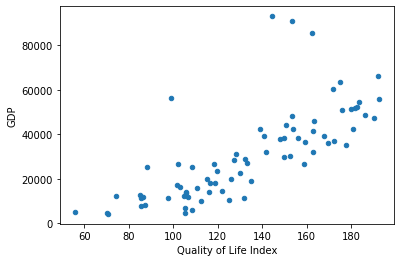

In [20]:
qol2020.plot.scatter(x='Quality of Life Index', y='GDP')

<AxesSubplot:xlabel='Quality of Life Index', ylabel='GDP'>

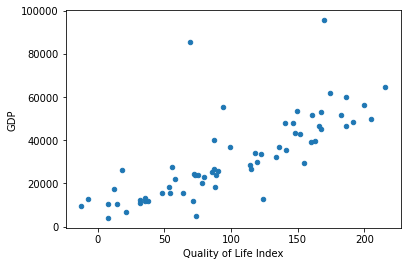

In [21]:
qol2013.plot.scatter(x='Quality of Life Index', y='GDP')

<AxesSubplot:xlabel='Quality of Life Index', ylabel='GDP'>

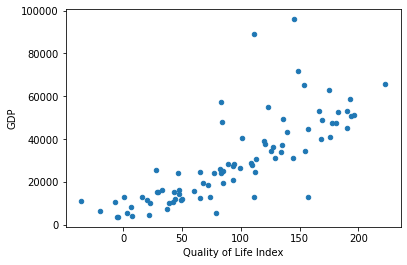

In [22]:
qol2015.plot.scatter(x='Quality of Life Index', y='GDP')

In [73]:
X = qol2020['GDP']
y = qol2020['Quality of Life Index']

In [74]:
X = X.drop(index=[542, 549, 560, 579])

In [75]:
y = y.drop(index=[542, 549, 560, 579])

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X = X.values
X = X.reshape(-1, 1)
X_poly = poly_reg.fit_transform(X)

In [36]:
import statsmodels.api as sm

In [85]:
model = sm.OLS(y, X_poly).fit()
ypred = model.predict(X_poly)

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Quality of Life Index   R-squared:                       0.736
Model:                               OLS   Adj. R-squared:                  0.728
Method:                    Least Squares   F-statistic:                     101.6
Date:                   Fri, 19 Nov 2021   Prob (F-statistic):           8.05e-22
Time:                           09:27:41   Log-Likelihood:                -325.71
No. Observations:                     76   AIC:                             657.4
Df Residuals:                         73   BIC:                             664.4
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4306      5.665     11.374      0.000      53.140      75.721
x1             0.0034      0.000     10.699      0.000       0.003       0.004
x2         -2.622e-08    3.7e-09     -7.084      0.000   -3.36e-08   -1.88e-08
==============================================================================
Omnibus:                       20.104   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.023
Skew:                          -0.988   Prob(JB):                     4.09e-08
Kurtosis:                       5.616   Cond. No.                     6.05e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
model.params

const    6.443057e+01
x1       3.386158e-03
x2      -2.621633e-08
dtype: float64

In [94]:
model.scale**.5

17.93591195908171

In [43]:
X.to_csv('t1.csv', index=False)
y.to_csv('t2.csv', index=False)

In [31]:
qol2019 = qol.loc[qol['Year'] == 2019]

In [32]:
gdp2019 = qol2019['GDP']

In [33]:
gdp2019[gdp2019.isnull()]

496   NaN
Name: GDP, dtype: float64

In [34]:
X = gdp2019.drop(index=496)
y = qol2019['Quality of Life Index'].drop(index=496)

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X = X.values
X = X.reshape(-1, 1)
X_poly = poly_reg.fit_transform(X)

In [38]:
model = sm.OLS(y, X_poly).fit()
ypred = model.predict(X_poly)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Quality of Life Index   R-squared:                       0.701
Model:                               OLS   Adj. R-squared:                  0.692
Method:                    Least Squares   F-statistic:                     78.49
Date:                   Fri, 19 Nov 2021   Prob (F-statistic):           2.76e-18
Time:                           10:59:26   Log-Likelihood:                -301.65
No. Observations:                     70   AIC:                             609.3
Df Residuals:                         67   BIC:                             616.0
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.5730      6.977      9.828      0.000      54.647      82.499
x1             0.0032      0.000      8.969      0.000       0.002       0.004
x2           -2.3e-08   3.89e-09     -5.911      0.000   -3.08e-08   -1.52e-08
==============================================================================
Omnibus:                       23.892   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.953
Skew:                          -1.154   Prob(JB):                     6.37e-11
Kurtosis:                       6.282   Cond. No.                     7.96e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model.params

const    6.857296e+01
x1       3.179756e-03
x2      -2.299635e-08
dtype: float64

In [40]:
model.scale**.5

18.398228970508125